<a href="https://colab.research.google.com/github/anwishn/project/blob/main/Mushroom_Model_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from keras.utils import load_img, img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from keras.applications.inception_v3 import preprocess_input
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Function to preprocess images
def preprocess_image(image_path, target_size=(299, 299)):
    image = load_img(image_path, target_size=target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)  # Use preprocess_input from InceptionV3
    return image

In [ ]:
# Function to extract features using VGG16
def extract_features(img_array, model):
    features = model.predict(img_array)
    return features

In [ ]:
# # Load the pre-trained VGG16 model for feature extraction
# base_model = VGG16(weights='imagenet')
# feature_model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

from keras.applications.inception_v3 import InceptionV3
inception_model = InceptionV3(weights='imagenet')
feature_model = Model(inputs=inception_model.input, outputs=inception_model.get_layer('mixed10').output)

96112376/96112376 [==============================] - 1s 0us/step


In [ ]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the dataset directories
base_dir = '/content/drive/MyDrive'
chanterelle_dir = os.path.join(base_dir, 'chanterelle')
non_chanterelle_dir = os.path.join(base_dir, 'non-chanterelle')

In [ ]:
# Extract features for each image and create labels
features = []
labels = []

# Process chanterelle images
for image_path in os.listdir(chanterelle_dir):
    img = preprocess_image(os.path.join(chanterelle_dir, image_path))
    feat = extract_features(img, feature_model)
    features.append(feat.flatten())
    labels.append(1)  # Chanterelle

1/1 [==============================] - 0s 221ms/step


In [ ]:
# Process non-chanterelle images
for image_path in os.listdir(non_chanterelle_dir):
    img = preprocess_image(os.path.join(non_chanterelle_dir, image_path))
    feat = extract_features(img, feature_model)
    features.append(feat.flatten())
    labels.append(0)

In [ ]:
# Convert to numpy arrays
features = np.array(features)
labels = np.array(labels)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)

# Output the shapes of the split data
print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

Training data shape: (272, 131072)
Test data shape: (68, 131072)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

def create_nn_model(input_shape):
    model = Sequential([
        Dense(512, activation='relu', kernel_regularizer=l2(0.001), input_shape=(input_shape,)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train the neural network
nn_model = create_nn_model(X_train.shape[1])


# Create a callback that saves the best model
checkpoint_cb = ModelCheckpoint("best_model.h5", save_best_only=True)

# Create early stopping callback
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model with callbacks
nn_history = nn_model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=64,
    validation_split=0.2,
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/25
4/4 [==============================] - ETA: 0s - loss: 2.6722 - accuracy: 0.4793

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 13s 3s/step - loss: 2.6722 - accuracy: 0.4793 - val_loss: 11.9387 - val_accuracy: 0.0000e+00
Epoch 2/25
4/4 [==============================] - 11s 3s/step - loss: 3.0746 - accuracy: 0.5300 - val_loss: 10.6979 - val_accuracy: 0.0000e+00
Epoch 3/25
4/4 [==============================] - 16s 5s/step - loss: 3.4681 - accuracy: 0.4931 - val_loss: 10.1497 - val_accuracy: 0.0000e+00
Epoch 4/25
4/4 [==============================] - 11s 3s/step - loss: 3.6009 - accuracy: 0.5023 - val_loss: 8.9374 - val_accuracy: 0.0000e+00
Epoch 5/25
4/4 [==============================] - 12s 4s/step - loss: 3.7553 - accuracy: 0.5622 - val_loss: 7.6783 - val_accuracy: 0.0000e+00
Epoch 6/25
4/4 [==============================] - 12s 3s/step - loss: 3.8155 - accuracy: 0.5576 - val_loss: 7.2682 - val_accuracy: 0.0000e+00
Epoch 7/25
4/4 [==============================] - 10s 3s/step - loss: 3.8050 - accuracy: 0.6590 - val_loss: 6.8339 - val_accuracy: 0.0000e+00
Epoch 8/25
4/4

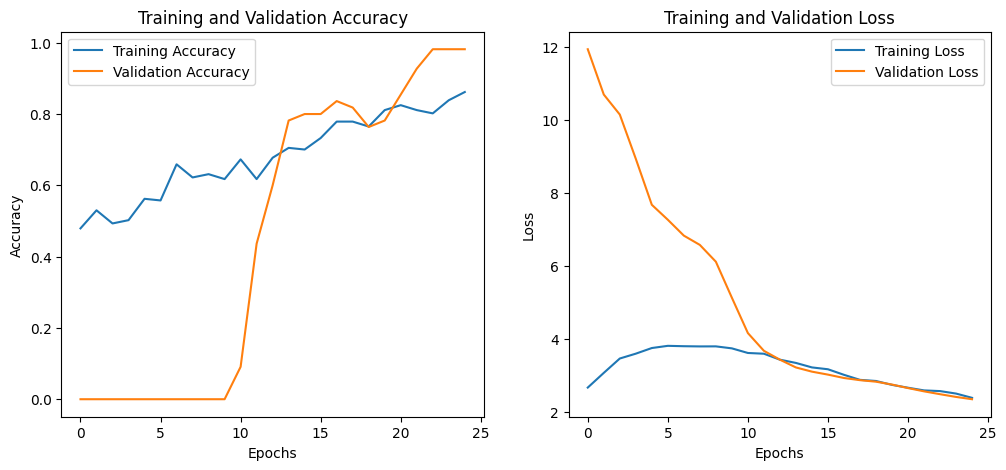

In [ ]:
import matplotlib.pyplot as plt

# nn_history is the return value from the model.fit call
history_dict = nn_history.history

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create and train the SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Evaluate the SVM
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test))
print(f'SVM Test Accuracy: {svm_accuracy}')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create and train the Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print(f'Random Forest Test Accuracy: {rf_accuracy}')

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example for SVM
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.001, 0.01], 'kernel': ['rbf', 'linear']}
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
best_svm_model = grid_search_svm.best_estimator_

# Example for Random Forest
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [4, 6, 8]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

In [ ]:
def evaluate_model(model, X, y, iterations=5):
    scores = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
    for i in range(iterations):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        scores['accuracy'].append(accuracy_score(y_test, predictions))
        scores['precision'].append(precision_score(y_test, predictions))
        scores['recall'].append(recall_score(y_test, predictions))
        scores['f1'].append(f1_score(y_test, predictions))
    return scores

# Use the function for both SVM and Random Forest
svm_scores = evaluate_model(best_svm_model, X_train, y_train)
rf_scores = evaluate_model(best_rf_model, X_train, y_train)

# Visualization can be done similarly to how accuracy and loss were visualized,
# but now you would have multiple points per metric to plot for each iteration.

In [ ]:
nn_model.save('nn_model.h5')
# Save other models using joblib for sklearn models
import joblib
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')

In [ ]:
nn_history.history

In [ ]:
# For SVM
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)

# For Random Forest
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

In [ ]:
plt.figure(figsize=(10, 5))

# SVM Confusion Matrix
plt.subplot(1, 2, 1)
svm_cm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Random Forest Confusion Matrix
plt.subplot(1, 2, 2)
rf_cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.show()